In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
root = "cloud_data/origin/"
dirs = os.listdir(root)
csvs = [[root + dir + "/" + file for file in os.listdir(root + "/" +dir)] for dir in dirs]

In [3]:
csvs

[['cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_7752.csv',
  'cloud_data/origin/偏平稳71/hangxin_valuelist_from2019-11-16to2019-12-16_4599.csv',
  'cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_7822.csv',
  'cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_8105.csv',
  'cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_7826.csv',
  'cloud_data/origin/偏平稳71/hangxin_valuelist_from2019-11-16to2019-12-16_4830.csv',
  'cloud_data/origin/偏平稳71/liantong_data_from2018-12-19to2019-01-31_8379.csv',
  'cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_7812.csv',
  'cloud_data/origin/偏平稳71/hangxin_valuelist_from2019-11-16to2019-12-16_964.csv',
  'cloud_data/origin/偏平稳71/hangxin_valuelist_from2019-11-16to2019-12-16_6207.csv',
  'cloud_data/origin/偏平稳71/zhongxin_data_from2019-01-01to2019-01-31_8040.csv',
  'cloud_data/origin/偏平稳71/hangxin_valuelist_from2019-11-16to2019-12-16_4588.csv',
  'cloud_data/origin/偏平稳71/hangxi

In [4]:
df = pd.read_csv(root + "cycle_43" + "/yinlian_value_from2020-11-10to2020-12-07_8442.csv")
value = df.value.copy()

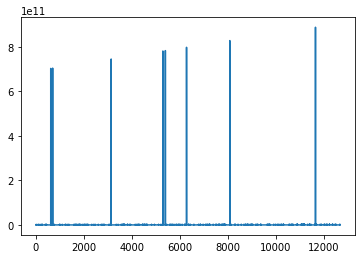

<Figure size 432x288 with 0 Axes>

In [25]:
import random
from matplotlib import pyplot as plt
line_df = pd.read_csv(root + 'line_59' + '/liantong_data_from2018-12-19to2019-01-31_8172.csv')
_len = len(line_df.index)
anomaly_rate = 0.2
anomaly_indices = [random.randint(0, _len) for _ in range(int(anomaly_rate * _len))]
for i in anomaly_indices:
    line_df.iloc[i,1] *= 256

x = range(1, _len)
y = line_df.iloc[1:,1]
plt.plot(x, y)
plt.show()
plt.savefig('res.png')

In [7]:
for i in range(100):
    white_noise = np.random.standard_normal(df.value.size)
    # plt.plot(value+ np.mean(value) / 10 * white_noise)
    value = pd.concat([value, df.value + np.mean(df.value) / 10 * white_noise])
    
value.size
    
# generate timestamps
interval = 1000
start_time = 946656000000
end_time = start_time + interval * (value.size - 1)
timestamps = pd.Series(np.linspace(start_time, end_time, value.size, dtype=int), name='Sensor')
value.name = 's_0'

res = pd.DataFrame(list(zip(timestamps, value)))

808000

In [32]:
res.to_csv('res.csv', index=False, sep=' ')

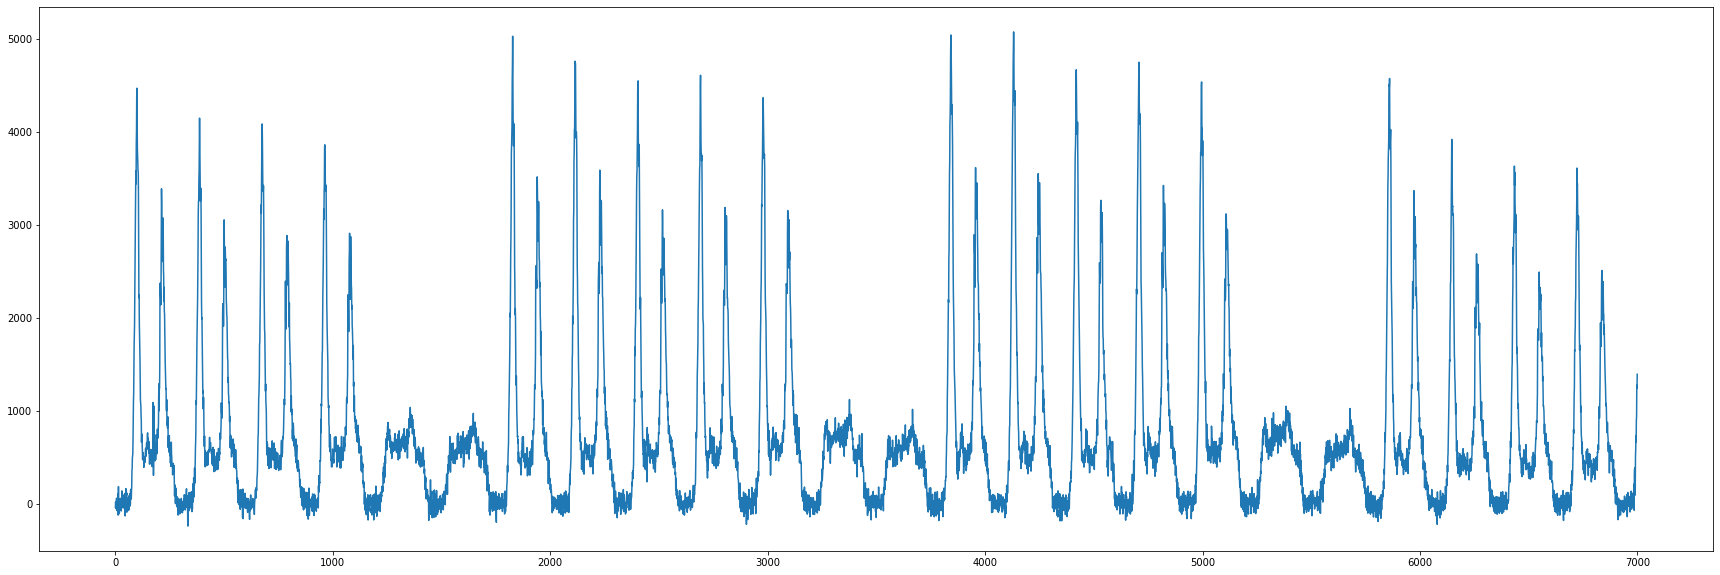

In [31]:
plt.figure(figsize=(30,10))
plt.plot(value[8000:15000])

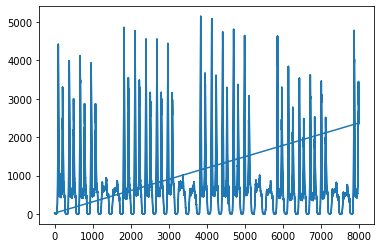

In [19]:
plt.plot(pd.concat([df.value, df.value]))